# **<font color=blue>image convolution & CNN</font>**

## 1. 在Lena實作高通濾波器（High pass filter），Sobel濾波器，Laplacian濾波器。
## 2. 實作CNN於Mnist

## 實作高通濾波器（High pass filter）
- 使用兩個不同kernal
    - [[-1, -1, -1], [ -1, 9, -1], [-1, -1, -1]]
    - [[0, -1, 0], [ -1, 5, -1],[0, -1, 0]]

原始圖檔


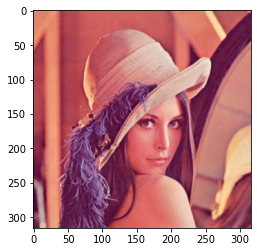

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


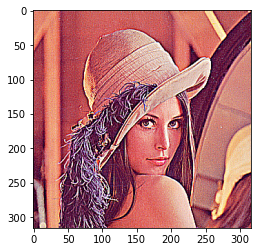

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


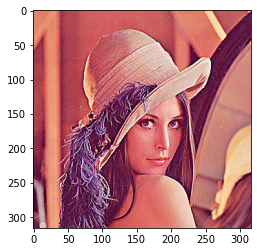

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img=cv2.imread("D:/Lenna.jpg", cv2.IMREAD_COLOR)
img = img[:,:,::-1]
kernel_size = 3

print("原始圖檔")
plt.imshow(img)
plt.show()

kernel = np.array([[-1, -1, -1], [ -1, 9, -1], [-1, -1, -1]])
kernel2 = np.array([[0, -1, 0], [ -1, 5, -1],[0, -1, 0]])
print (kernel)
# 使用cv2.filter2D進行convolute，
img1 = cv2.filter2D(img, ddepth=3, dst=-1, kernel=kernel, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
img2 = cv2.filter2D(img, ddepth=3, dst=-1, kernel=kernel2, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
#cv2.imwrite("D:/Lenna_convoluted_Low.jpg", img)
plt.imshow(img1)
plt.show()
print (kernel2)
plt.imshow(img2)
plt.show()





## Sobel濾波器
- 使用兩個不同kernal
    - [[1, 0, -1], [ 2, 0, -2], [1, 0, -1]]
    - [[1, 2, 1], [ 0, 0, 0],[-1, -2, -1]]

原始圖檔


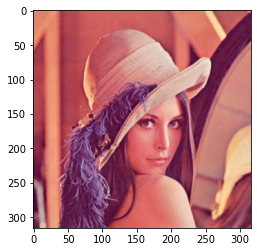

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


垂直
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


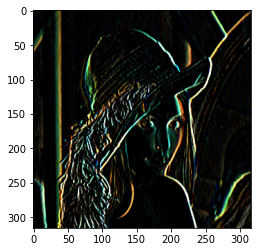

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


水平
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


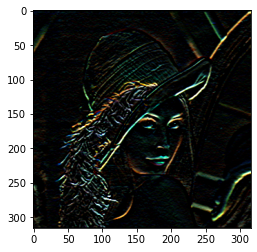

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img=cv2.imread("D:/Lenna.jpg", cv2.IMREAD_COLOR)
img = img[:,:,::-1]
kernel_size = 3

print("原始圖檔")
plt.imshow(img)
plt.show()

kernel = np.array([[1, 0, -1], [ 2, 0, -2], [1, 0, -1]])
kernel2 = np.array([[1, 2, 1], [ 0, 0, 0],[-1, -2, -1]])

# 使用cv2.filter2D進行convolute，
img1 = cv2.filter2D(img, ddepth=3, dst=-1, kernel=kernel, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
img2 = cv2.filter2D(img, ddepth=3, dst=-1, kernel=kernel2, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
#cv2.imwrite("D:/Lenna_convoluted_Low.jpg", img)
print("垂直")
print (kernel)
plt.imshow(img1)
plt.show()

print("水平")
print (kernel2)
plt.imshow(img2)
plt.show()





## Laplacian濾波器
- 使用兩個不同kernal
    - [[0, 1, 0], [ 1, -4, 1], [0, 1, 0]]
    - [[0, 1, 0], [ 1, -4, 1], [0, 1, 0]]
- 第二個的3*3的陣列跟ppt稍微不同，因為ppt上陣列做出來的圖片和實際上不同，所以有稍微修改了一下

原始圖檔


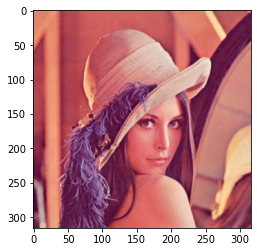

Pic1
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


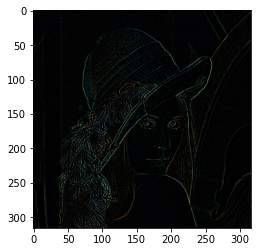

Pic2
[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


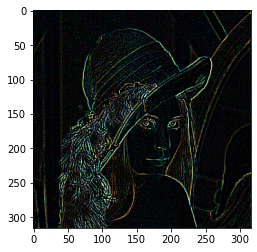

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img=cv2.imread("D:/Lenna.jpg", cv2.IMREAD_COLOR)
img = img[:,:,::-1]
kernel_size = 3

print("原始圖檔")
plt.imshow(img)
plt.show()

kernel = np.array([[0, 1, 0], [ 1, -4, 1], [0, 1, 0]])
kernel2 = np.array([[1, 1, 1], [ 1, -8, 1],[1, 1, 1]])

# 使用cv2.filter2D進行convolute，
img1 = cv2.filter2D(img, ddepth=3, dst=-1, kernel=kernel, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
img2 = cv2.filter2D(img, ddepth=3, dst=-1, kernel=kernel2, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
#cv2.imwrite("D:/Lenna_convoluted_Low.jpg", img)
print("Pic1")
print (kernel)
plt.imshow(img1)
plt.show()

print("Pic2")
print (kernel2)
plt.imshow(img2)
plt.show()





## 實作CNN於Mnist

### 使用Sequential為主要框架
### 建構模型時相較ppt多加了dropout來避免overfitting，最後將訓練完成的模型儲存
### 另外加了一個function來畫出train的紀錄，分別是
- train
- validation

### 結果
- loss:0.033156126737594604
- accuracy: 0.9890000224113464

60000 train samples
10000 test samples
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense

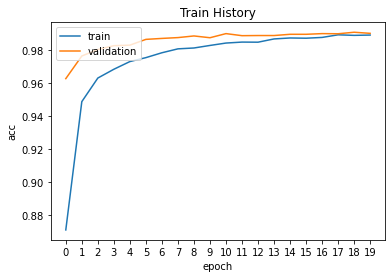

Test loss: 0.033156126737594604
Test accuracy: 0.9890000224113464
succeed


In [67]:
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

def show(train_history):
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.xticks([i for i in range(0, len(train_history.history['accuracy']))])
    plt.title('Train History')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
train_history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.2, verbose = 1)
show(train_history)
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

try:
    model.save_weights('D:/mnist.h5')
    print("succeed")
except:
    print("failed")
    

## 實作CNN於Mnist並測試
### 在網路上找了隨機的照片，並用先前訓練好的模型測試是否能正確分辨
### 結果:正確分辨出6
- 在prediction[0]裡的1位置即為該數字
- 用for找出一的位置就輸出

succeed
[[0 0 0 0 0 0 1 0 0 0]]
this nimber is:  6


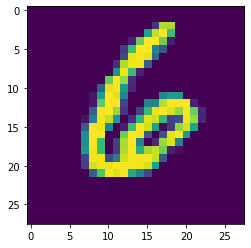

In [92]:
import cv2
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from PIL import Image
import numpy as np
try:
    model.load_weights('D:/mnist.h5')
    print("succeed")
except:
    print("failed")

    

img = np.array(Image.open('D:/mnist1.png').convert('L'))
img = cv2.resize(img, (28,28))
plt.imshow(img)
img = img.reshape(1, 28, 28, 1).astype('float32')
x = img.astype('float32')/255
prediction = model.predict(x)
#print(prediction[0])
prediction = np.round(prediction).astype(int)
print(prediction)
c = 0
for i in prediction[0]:
    if i == 1:
        print("this nimber is: ",c)
    c+=1